In [52]:
%%HTML
<style>
div.prompt {display:none}
</style>

# TensorFlow, Mini-Batch/Stochastic GradientDescent With Moment

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys
import time

In [65]:
from IPython.display import Image
sys.path.append('/home/pedro/git/ElCuadernillo/ElCuadernillo/20160301_TensorFlowGradientDescentWithMomentum')

In [4]:
import gradient_descent_with_momentum as gdt

#### Input
Generamos la muestra de grado 4

Coeficientes:  [-0.65240887 -3.8030396   4.9922934  -1.49568513]


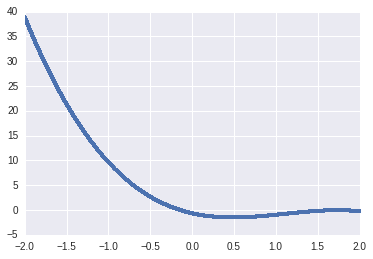

In [5]:
grado=4
tamano=100000
x,y,coeficentes=gdt.generar_muestra(grado,tamano)
print ("Coeficientes: ",coeficentes)
plt.plot(x,y,'.')

## Problema
**Calcular los coeficientes que mejor se ajusten a la muestra sabiendo que es de grado 4**

#### Generamos la matriz de coeficientes de grado 4

In [54]:
train_x=gdt.generar_matriz_coeficientes(x,grado) # MatrizA
train_y=np.reshape(y,(y.shape[0],-1)) # VectorColumna
learning_rate_inicial=1e-2

### Solucion 1: Por medio *gradient descent*

In [76]:
pesos_gd,ecm_gd,tiempo_gd=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=1,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.0)

Iteracion 370:
	Pesos: [-0.5  -3.09  4.92 -1.75]
	ecm: 0.11996486037969589
Tiempo de calculo: 5.289718866348267
----------------------


<img src="capturas/gradient_descent.png">

### Solución 2: Por medio *mini-batch=1000  gradient descent*

In [77]:
pesos_mgd,ecm_mgd,tiempo_mgd=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=10000,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.0)

Iteracion 402:
	Pesos: [-0.54 -3.21  4.94 -1.7 ]
	ecm: 0.08897928148508072
Tiempo de calculo: 0.38129377365112305
----------------------


<img src="capturas/mini_batch_gradient_descent.png">

### Solución 3: Por medio *mini-batch=10000  gradient descent With Moment*

In [59]:
pesos_mgdm,ecm_mgdm,tiempo_mgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=10000,
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.9)

Iteracion 71:
	Pesos: [-0.71 -3.64  4.94 -1.57]
	ecm: 0.03716972470283508
Tiempo de calculo: 0.14355134963989258
----------------------


<img src="capturas/minibatch_gradient_descent_momentum.png">

### Solución 4: Por medio *mini-batch=1  Stocastict gradient descent With Moment*

In [75]:
pesos_sgdm,ecm_sgdm,tiempo_sgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=len(train_x),
                                                             learning_rate_inicial=learning_rate_inicial,
                                                             momentum=0.9)

Iteracion 500:
	Pesos: [ -1.32e+12   7.54e+11  -3.85e+12  -3.30e+12]
	ecm: 2.055166457001165e+24
Iteracion 745:
	Pesos: [ -3.62e+17  -2.14e+17  -2.48e+18   2.40e+17]
	ecm: inf
Tiempo de calculo: 0.5769433975219727
----------------------


<img src="capturas/stocastic_gradient_descent_momentum_fail.png">

In [62]:
pesos_sgdm,ecm_sgdm,tiempo_sgdm=gdt.gradient_descent_with_momentum(train_x,
                                                             train_y,
                                                             num_mini_batch=len(train_x),
                                                             learning_rate_inicial=1e-3, # Disminuimos la tasa de aprendizaje
                                                             momentum=0.9)

Iteracion 478:
	Pesos: [-0.52 -3.3   4.96 -1.73]
	ecm: 0.02569892257452011
Tiempo de calculo: 0.41315317153930664
----------------------


<img src="capturas/stocastic_gradient_descent_momentum_correct.png">